# Impute/Replace missing values


---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---


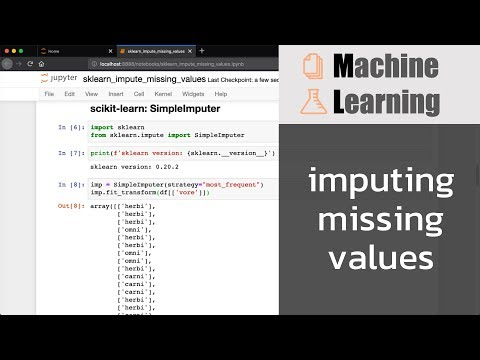

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("T2yT5vt1NaQ", width=720, height=405)



In [2]:
import pandas as pd
import numpy as np


In [3]:
print(f"pandas version: {pd.__version__}")
print(f"numpy  version: {np.__version__}")



pandas version: 1.4.1
numpy  version: 1.21.5


In [4]:
df = pd.read_csv("https://github.com/prasertcbs/tutorial/raw/master/msleep.csv")
df = df.sample(20, random_state=123)
df


,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
69,Arctic ground squirrel,Spermophilus,herbi,Rodentia,lc,16.6,NaN,NaN,7.40,0.00570,0.920
75,Eastern american chipmunk,Tamias,herbi,Rodentia,NaN,15.8,NaN,NaN,8.20,NaN,0.112
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.00,0.42300,600.000
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.10,0.00250,0.104
29,Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NaN,22.10,NaN,899.995
62,Rock hyrax,Procavia,NaN,Hyracoidea,lc,5.4,0.5,NaN,18.60,0.02100,3.600
24,European hedgehog,Erinaceus,omni,Erinaceomorpha,lc,10.1,3.5,0.283333,13.90,0.00350,0.770
37,Macaque,Macaca,omni,Primates,NaN,10.1,1.2,0.750000,13.90,0.17900,6.800
76,Brazilian tapir,Tapirus,herbi,Perissodactyla,vu,4.4,1.0,0.900000,19.60,0.16900,207.501
31,Gray seal,Haliochoerus,carni,Carnivora,lc,6.2,1.5,NaN,17.80,0.32500,85.000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 69 to 81
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          20 non-null     object 
 1   genus         20 non-null     object 
 2   vore          18 non-null     object 
 3   order         20 non-null     object 
 4   conservation  14 non-null     object 
 5   sleep_total   20 non-null     float64
 6   sleep_rem     14 non-null     float64
 7   sleep_cycle   9 non-null      float64
 8   awake         20 non-null     float64
 9   brainwt       16 non-null     float64
 10  bodywt        20 non-null     float64
dtypes: float64(6), object(5)
memory usage: 1.9+ KB


### check NA in 'vore' column


In [6]:
df[df.vore.isna()]


,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
62,Rock hyrax,Procavia,NaN,Hyracoidea,lc,5.4,0.5,NaN,18.6,0.02100,3.600
72,Musk shrew,Suncus,NaN,Soricomorpha,NaN,12.8,2.0,0.183333,11.2,0.00033,0.048


## scikit-learn: SimpleImputer


In [7]:
import sklearn
from sklearn.impute import SimpleImputer


In [8]:
print(f"sklearn version: {sklearn.__version__}")



sklearn version: 1.0.2


In [9]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(df[["vore"]])



array([['herbi'],
       ['herbi'],
       ['herbi'],
       ['omni'],
       ['herbi'],
       ['herbi'],
       ['omni'],
       ['omni'],
       ['herbi'],
       ['carni'],
       ['carni'],
       ['carni'],
       ['herbi'],
       ['herbi'],
       ['carni'],
       ['herbi'],
       ['herbi'],
       ['omni'],
       ['herbi'],
       ['carni']], dtype=object)

In [10]:
df["vore2"] = imp.fit_transform(df[["vore"]])
df[df.vore.isna()][["name", "vore", "vore2"]]



,name,vore,vore2
62,Rock hyrax,NaN,herbi
72,Musk shrew,NaN,herbi


In [11]:
imp2 = SimpleImputer(strategy="constant", fill_value="omni")
df["vore3"] = imp2.fit_transform(df[["vore"]])
df[df.vore.isna()][["name", "vore", "vore2", "vore3"]]



,name,vore,vore2,vore3
62,Rock hyrax,NaN,herbi,omni
72,Musk shrew,NaN,herbi,omni


In [12]:
df


,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt,vore2,vore3
69,Arctic ground squirrel,Spermophilus,herbi,Rodentia,lc,16.6,NaN,NaN,7.40,0.00570,0.920,herbi,herbi
75,Eastern american chipmunk,Tamias,herbi,Rodentia,NaN,15.8,NaN,NaN,8.20,NaN,0.112,herbi,herbi
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.00,0.42300,600.000,herbi,herbi
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.10,0.00250,0.104,omni,omni
29,Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NaN,22.10,NaN,899.995,herbi,herbi
62,Rock hyrax,Procavia,NaN,Hyracoidea,lc,5.4,0.5,NaN,18.60,0.02100,3.600,herbi,omni
24,European hedgehog,Erinaceus,omni,Erinaceomorpha,lc,10.1,3.5,0.283333,13.90,0.00350,0.770,omni,omni
37,Macaque,Macaca,omni,Primates,NaN,10.1,1.2,0.750000,13.90,0.17900,6.800,omni,omni
76,Brazilian tapir,Tapirus,herbi,Perissodactyla,vu,4.4,1.0,0.900000,19.60,0.16900,207.501,herbi,herbi
31,Gray seal,Haliochoerus,carni,Carnivora,lc,6.2,1.5,NaN,17.80,0.32500,85.000,carni,carni


In [13]:
# imp3=SimpleImputer(strategy='mean')
# imp3=SimpleImputer(strategy='median')
imp3 = SimpleImputer(strategy="constant", fill_value=-99)
df["sleep_rem4"] = imp3.fit_transform(df[["sleep_rem"]])
df[df.sleep_rem.isna()][["name", "sleep_rem", "sleep_rem4"]]
# df[df.sleep_rem.isna()][['name', 'sleep_rem', 'sleep_rem2', 'sleep_rem3', 'sleep_rem4']]


,name,sleep_rem,sleep_rem4
69,Arctic ground squirrel,NaN,-99.0
75,Eastern american chipmunk,NaN,-99.0
44,Slow loris,NaN,-99.0
9,Roe deer,NaN,-99.0
59,Common porpoise,NaN,-99.0
81,Arctic fox,NaN,-99.0


In [14]:
# imp_x=SimpleImputer(strategy='mean')
# imp_x=SimpleImputer(strategy='median')
# imp_x=SimpleImputer(strategy='most_frequent')
imp_x = SimpleImputer(missing_values=-99, strategy="constant", fill_value=np.nan)

df["sleep_rem5"] = imp_x.fit_transform(df[["sleep_rem4"]])
df[df.sleep_rem4 == -99.0][["name", "sleep_rem4", "sleep_rem5"]]



,name,sleep_rem4,sleep_rem5
69,Arctic ground squirrel,-99.0,NaN
75,Eastern american chipmunk,-99.0,NaN
44,Slow loris,-99.0,NaN
9,Roe deer,-99.0,NaN
59,Common porpoise,-99.0,NaN
81,Arctic fox,-99.0,NaN


In [15]:
imp_x = SimpleImputer(strategy="mean")
# imp_x=SimpleImputer(strategy='median')
# imp_x=SimpleImputer(strategy='most_frequent')
# imp_x=SimpleImputer(missing_values=-99, strategy='constant', fill_value=np.nan)

df["sleep_rem6"] = imp_x.fit_transform(df[["sleep_rem5"]])
df[df.sleep_rem5.isna()][["name", "sleep_rem4", "sleep_rem5", "sleep_rem6"]]



,name,sleep_rem4,sleep_rem5,sleep_rem6
69,Arctic ground squirrel,-99.0,NaN,2.0
75,Eastern american chipmunk,-99.0,NaN,2.0
44,Slow loris,-99.0,NaN,2.0
9,Roe deer,-99.0,NaN,2.0
59,Common porpoise,-99.0,NaN,2.0
81,Arctic fox,-99.0,NaN,2.0
